# Peforming model training using sklearn's LinearRegression model

In this notebook, the synthetic data generated in the synthetic_data_ntbk was imported and used to train sklearn's LinearRegression model. The linear model utilizes coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset and the targets predicted by the linear approximation.

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

---

In [ ]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import random
import json
import datetime as dt
import pprint
import re

# Needed for generating classification, regression and clustering datasets
import sklearn.datasets as dt

### Import synthetic training and validation data from corresponding directory and verify data integrity
---

In [5]:
training_df = pd.read_csv('data/training_data.csv')
validation_df = pd.read_csv('data/validation_data.csv')

In [6]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       640 non-null    float64
 1   1       640 non-null    float64
 2   2       640 non-null    float64
 3   3       640 non-null    float64
 4   4       640 non-null    float64
 5   5       640 non-null    float64
 6   6       640 non-null    float64
 7   target  640 non-null    float64
dtypes: float64(8)
memory usage: 40.1 KB


In [7]:
validation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       200 non-null    float64
 1   1       200 non-null    float64
 2   2       200 non-null    float64
 3   3       200 non-null    float64
 4   4       200 non-null    float64
 5   5       200 non-null    float64
 6   6       200 non-null    float64
 7   target  200 non-null    float64
dtypes: float64(8)
memory usage: 12.6 KB


### Plot a paiplot to visualize the relationships between all of the columns in the training dataframe.
---

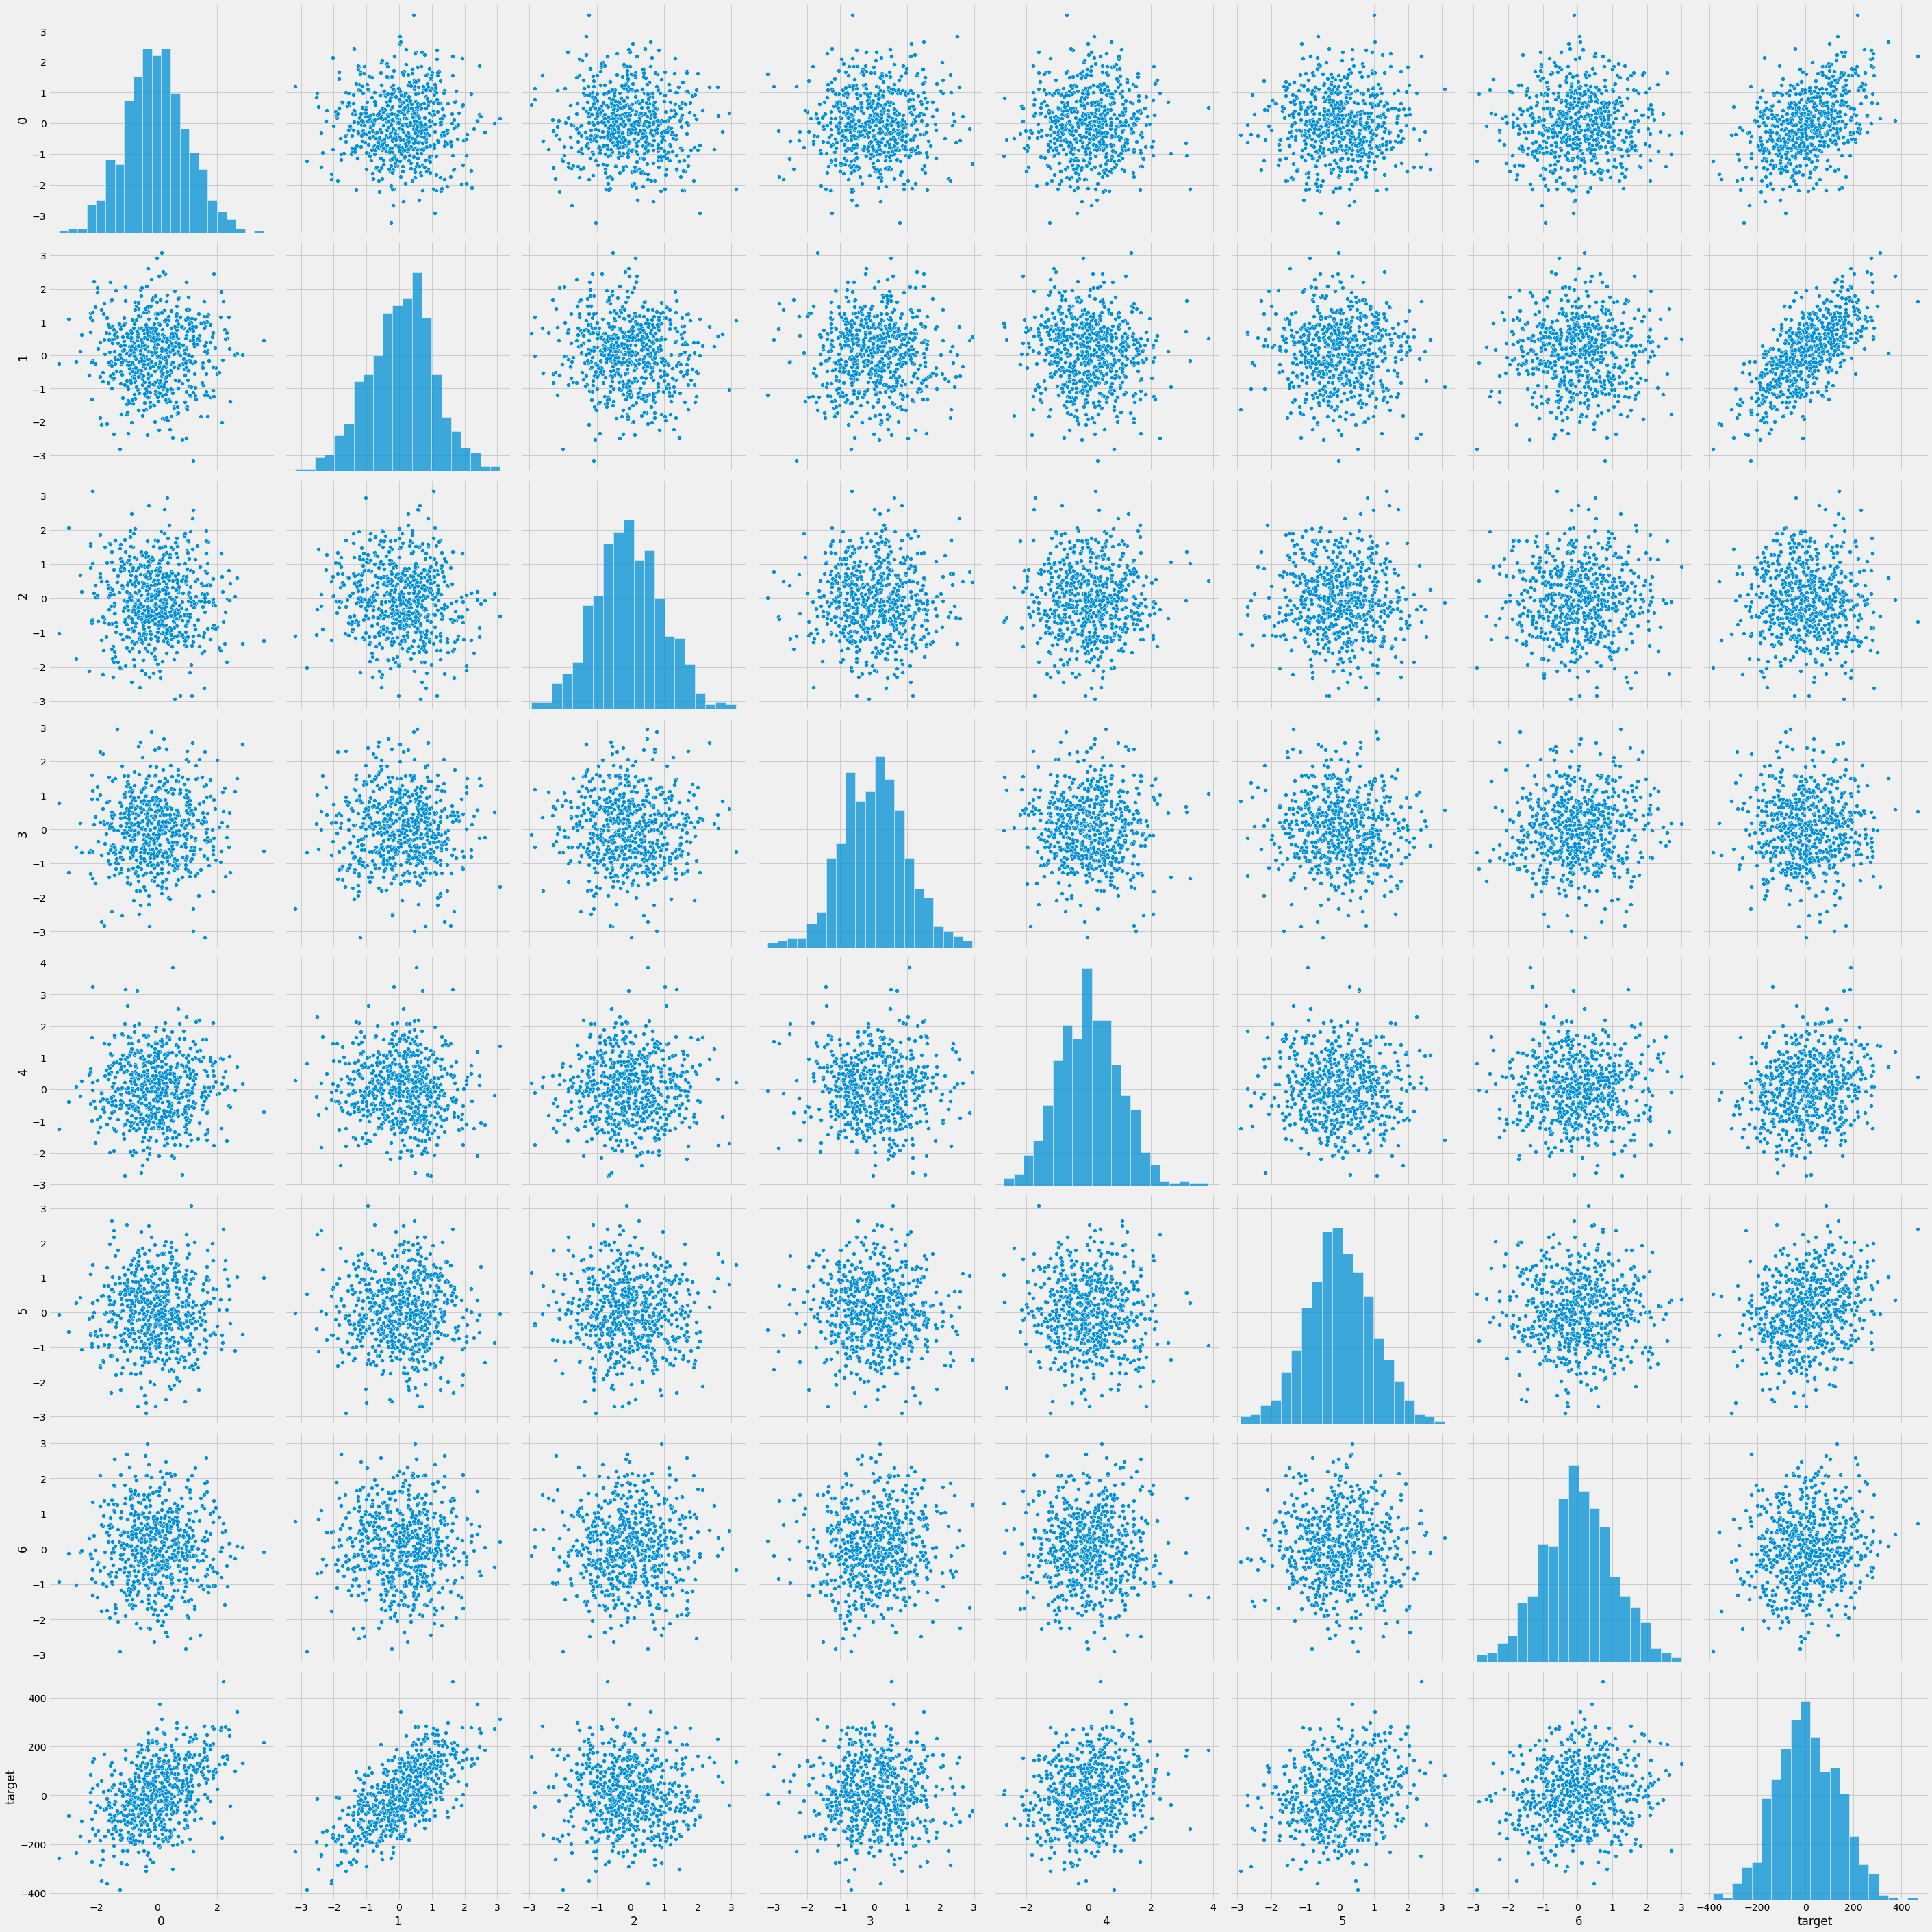

In [9]:
plt.style.use('fivethirtyeight')

sns.pairplot(training_df, height=5)
plt.show()

## Model Training

After visualizing the relationships of each column in the training data, some key relationships were identified. Namely, the slightly distinct linear relationship between columns 0 and 1 with the target column. 
To further drive this point, a heatmap of the correlation values of all the columns was plotted below.

---

Text(0.5, 1.0, '\nTraining data:\nSorted correlation values\n')

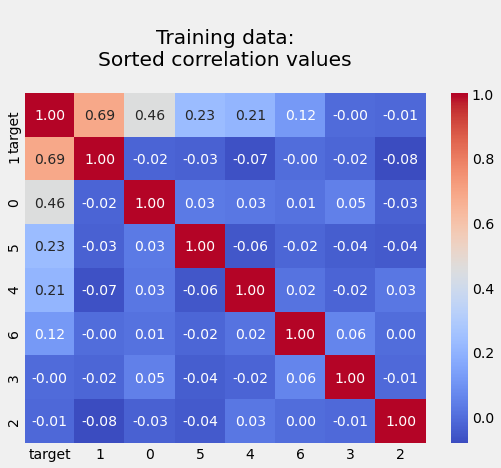

In [10]:
plt.style.use('fivethirtyeight')

target = 'target'
k = len(training_df.columns)

corr_vals = training_df.corr()
cols = corr_vals.nlargest(k, target)[target].index

corr_coeffs = np.corrcoef(training_df[cols].values.T)

ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(corr_coeffs, cmap='coolwarm', annot=True, fmt='.2f', yticklabels=cols.values, xticklabels=cols.values)
ax.set_title('\nTraining data:\nSorted correlation values\n')

From the correlation heatmap above, we were able to confirm that columns 0 and 1 have the highest correlation with the target column. This tells us that they have the most linear relationships. 
Since we only have seven feature columns, we will use all of them to train the LinearRegression model. However, in the event that the number of existing feature columns exceeds 10, we could use the
correlation heatmap method to select a handful of feature columns that we can use to train a model to prevent the problems posed by high dimensionality.

---

In [11]:
from sklearn.linear_model import LinearRegression

# determine the set of beta coefficients that can be multiplied to each 
# row to acquire the temperature value 
linear_model = LinearRegression()
linear_model.fit(training_df[['0', '1', '2', '3', '4', '5', '6']], training_df['target'])

LinearRegression()

After training the LinearRegression model, we can then display all of the coefficient values that were generated and sort them

---

In [12]:
# display how many estimated coefficient values were generated and 
# visualize them against the Dataset columns

print(f'\nNumber of estimated coefficient values: {len(linear_model.coef_)}\n')
print(f"Coefficient values: {linear_model.coef_}\n")

coeffs_df = pd.DataFrame(list(linear_model.coef_))
coeffs_df.sort_values(by=[0], ascending=False)


Number of estimated coefficient values: 7

Coefficient values: [58.22314681 95.14480641  8.76009151 -0.91246085 33.57531754 34.14630111
 14.6519546 ]



,0
1,95.144806
0,58.223147
5,34.146301
4,33.575318
6,14.651955
2,8.760092
3,-0.912461


## Plot the relationship between the feature column with the highest coefficient value and the target column using the seaborn library's regplot
---

C:\Users\matthewkent.regalado\Anaconda3\envs\project-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '\nRelationship between\ncolumn with highest beta coeff\nand target column\n')

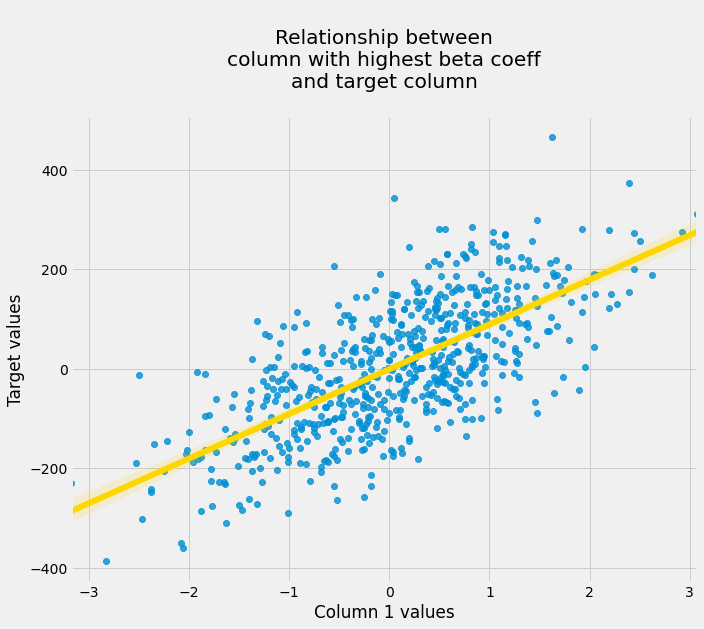

In [13]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,8))

best_coeff = str(coeffs_df[0].argmax())

sns.regplot(training_df[best_coeff], training_df['target'], line_kws={'color': 'gold'})
plt.xlabel(f'Column {best_coeff} values')
plt.ylabel('Target values')
plt.title("\nRelationship between\ncolumn with highest beta coeff\nand target column\n")

## Pickle LinearRegression model

In order to preserve the model artifacts, we need to pickle the model. The joblib library was used since it is the de facto library for models that deal with a large number of numpy arrays.

---

In [18]:
import joblib

# Save trained LinearRegression pickle in 'models/'
joblib_file = "models/capstone_lr_model.pkl"
joblib.dump(linear_model, joblib_file)

['models/capstone_lr_model.pkl']

## Evaluate the model's performance by using performing predictions using the validation dataframe

---

In [117]:
# Load from file
lr_model = joblib.load(joblib_file)

Y_predict = lr_model.predict(validation_df[['0', '1', '2', '3', '4', '5', '6']])

## Store all of the results in a dataframe for model evaluation purposes
---

In [118]:
# init empty df 
# will be used for model evaluation 
valid_df = pd.DataFrame()

valid_df['actual'] = validation_df['target']
valid_df['lr_predictions'] = Y_predict

In [127]:
# helper function for evaluating a model
def evaluate(model, features, labels):
    predictions = model.predict(features)
    mean_squared_error = np.mean((labels - predictions)**2)
    score = model.score(features, labels)

    print(f'\nMSE = {mean_squared_error}')
    print(f'Model accuracy (R^2 score) = {score * 100}\n')
    
    return mean_squared_error, score

In [128]:
lr_mse, lr_accuracy = evaluate(
    lr_model, 
    validation_df[['0', '1', '2', '3', '4', '5', '6']], 
    validation_df['target']
)


MSE = 2568.4943089018343
Model accuracy (R^2 score) = 83.98035302706434



In [121]:
lr_data = {
    'algorithm': ['LinearRegression'],
    'MSE': [lr_mse],
    'r2_score': [lr_accuracy*100]
}

#create dataframe
eval_df = pd.DataFrame(lr_data)
eval_df.head()

,algorithm,MSE,r2_score
0,LinearRegression,2568.494309,83.980353


In [122]:
valid_df.head()

,actual,lr_predictions
0,223.013403,249.381526
1,103.557634,50.058942
2,208.844585,189.456792
3,-65.937306,-36.324588
4,-37.186189,-57.440259


## Export model evaluation dataframes into csv files
---

In [123]:
valid_df.to_csv('data/valid_data.csv', index=False)
eval_df.to_csv('data/evaluation_data.csv', index=False)